# Plots

This is a workspace for much of the plotting/data vis I need to do. I will do my best not to repeat visualisations created in the other files here

## Library Imports

In [10]:
#Basics
import pandas as pd
import geopandas as gpd
import numpy as np

#Plots and Stats
import matplotlib.pyplot as plt
import seaborn as sns

# Geometry
from shapely import wkt
from shapely.geometry import Polygon, MultiPolygon

## Data Imports

In [11]:
# Raw Overture Maps Places
london_places = gpd.read_file('data/overture_data/london_places.geojson')
bham_places = gpd.read_file('data/overture_data/bham_places.geojson')

# All London Data
all_data_london = pd.read_csv("data/combined_data/lag/all_data_london_lag.csv")

# All Birmingham Data
all_data_bham = pd.read_csv("data/combined_data/lag/all_data_bham_lag.csv")

# Convert data to GDF
all_data_london['geometry'] = all_data_london['geometry'].apply(wkt.loads)
all_data_bham['geometry'] = all_data_bham['geometry'].apply(wkt.loads)

all_data_london = gpd.GeoDataFrame(all_data_london, geometry='geometry')
all_data_bham = gpd.GeoDataFrame(all_data_bham, geometry='geometry')

all_data_london.set_crs(epsg=4326, inplace=True)
all_data_bham.set_crs(epsg=4326, inplace=True)

# Filter places to boundary areas
london_places_join = gpd.sjoin(london_places, all_data_london, how='inner', op='within')
bham_places_join = gpd.sjoin(bham_places, all_data_bham, how='inner', op='within')

london_places = london_places_join[london_places.columns]
bham_places = bham_places_join[bham_places.columns]

/Users/gavinrolls/anaconda3/envs/urbsim/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/gavinrolls/anaconda3/envs/urbsim/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [377]:
# Sanity Check
london_places.head()

,name,category,confidence,geometry
1519,"The Star, Malden Rushett",pub,0.96,POINT (-0.32762 51.32683)
1520,Hillcroft Bed And Breakfast,bed_and_breakfast,0.77,POINT (-0.32662 51.32736)
1521,C-Ceramics,None,0.77,POINT (-0.32662 51.32736)
36917,The Star Gun Club,active_life,0.86,POINT (-0.32914 51.32922)
36918,Byhurst Farm Clay Shoot,farm,0.92,POINT (-0.32463 51.33735)


## Plots

### Kernel Density Estimation - Overture Maps Places

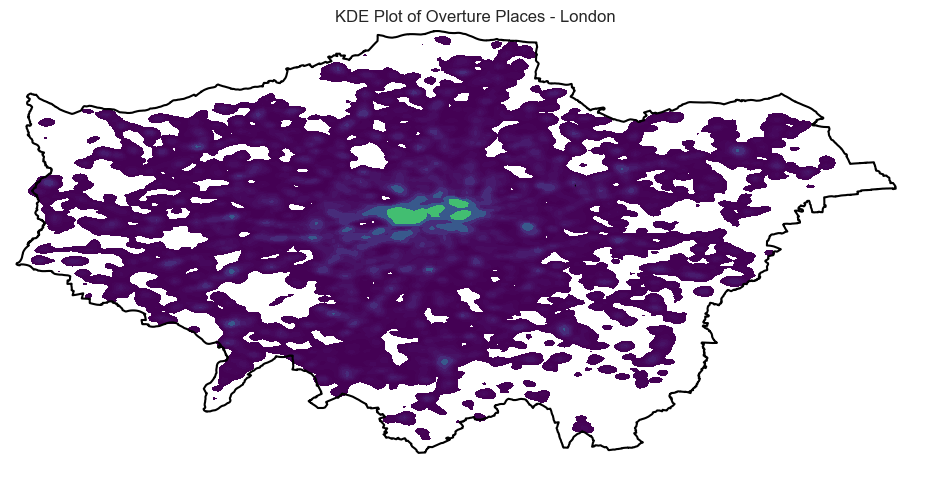

In [348]:
# Plot for Greater London

plt.figure(figsize=(12, 10))

sns.kdeplot(
    x=london_places.geometry.x,
    y=london_places.geometry.y,
    cmap='viridis',
    fill=True,
    bw_adjust=0.2
)

sns.set_theme()

greater_london_boundary = all_data_london.unary_union
boundary_gdf = gpd.GeoDataFrame(geometry=[greater_london_boundary], crs=all_data_london_gdf.crs)
boundary_gdf.boundary.plot(ax=plt.gca(), color='black')

# Add labels and title
plt.axis('off')
plt.title('KDE Plot of Overture Places - London')

# Show the plot
plt.show()

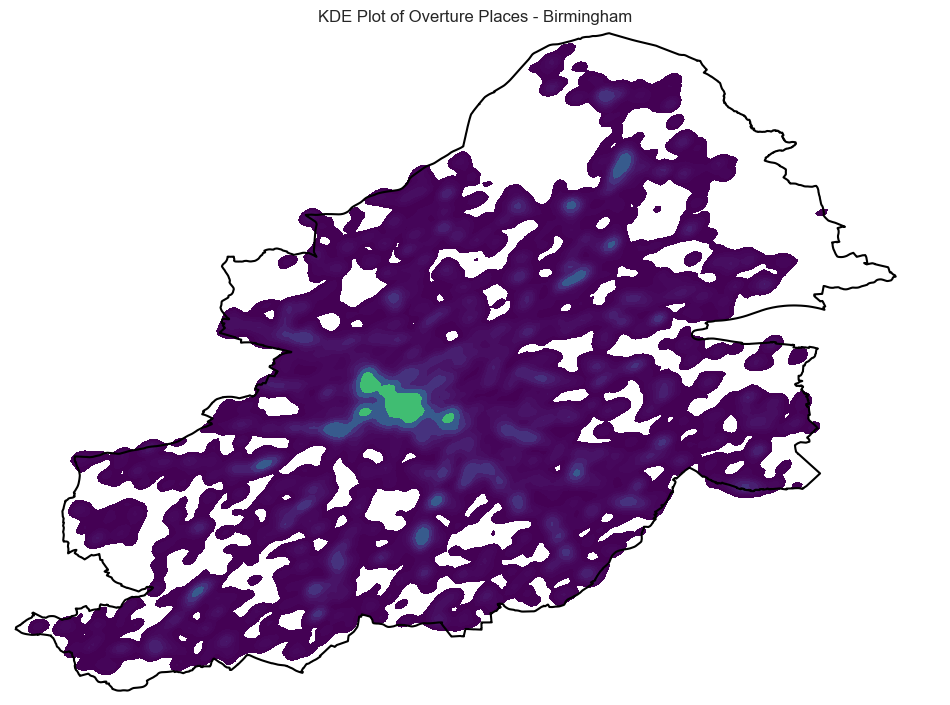

In [337]:
# Plot for Birmingham

plt.figure(figsize=(12, 10))

sns.kdeplot(
    x=bham_places.geometry.x,
    y=bham_places.geometry.y,
    cmap='viridis',
    fill=True,
    bw_adjust=0.2
)
sns.set_theme()

bham_boundary = all_data_bham.unary_union
boundary_gdf = gpd.GeoDataFrame(geometry=[bham_boundary], crs=all_data_bham_gdf.crs)
boundary_gdf.boundary.plot(ax=plt.gca(), color='black')

# Add labels and title
plt.axis('off')
plt.title('KDE Plot of Overture Places - Birmingham')

# Show the plot
plt.show()

### Histogram of POIs per LSOA

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/2270869387.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


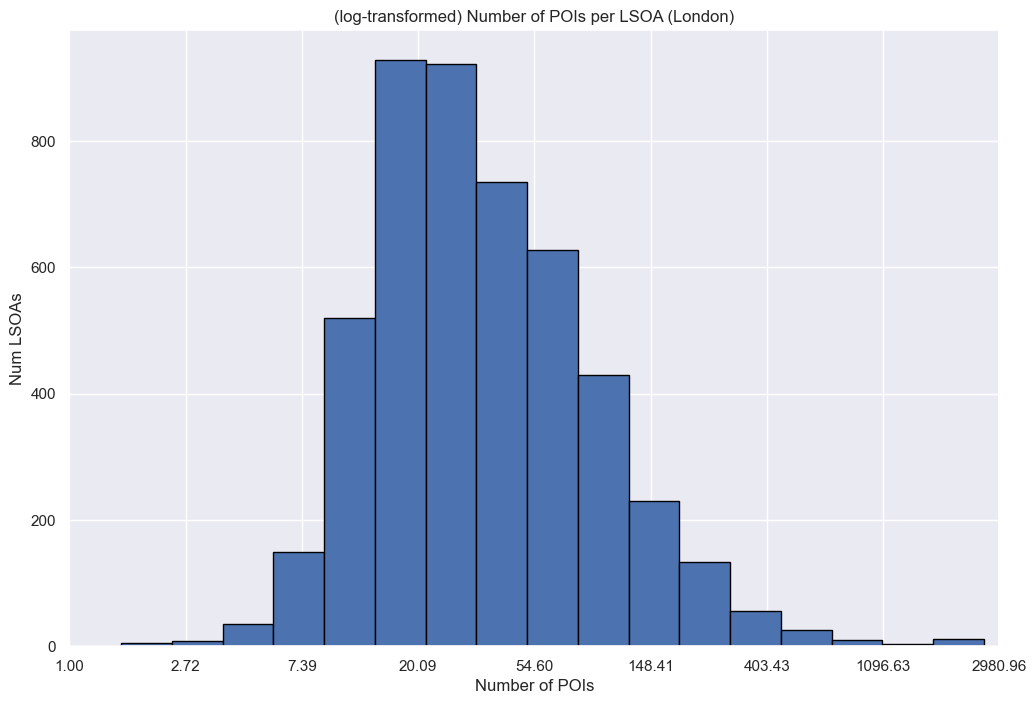

In [56]:
places_per_lsoa = pd.DataFrame(all_data_london['log_num_places'])


plt.figure(figsize=(12, 8))
plt.hist(places_per_lsoa, bins=20, edgecolor='black')
sns.set_theme()
plt.xlim(0,8)
plt.ylabel('Num LSOAs')
plt.xlabel('Number of POIs')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.title('(log-transformed) Number of POIs per LSOA (London)')
plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/1130265843.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


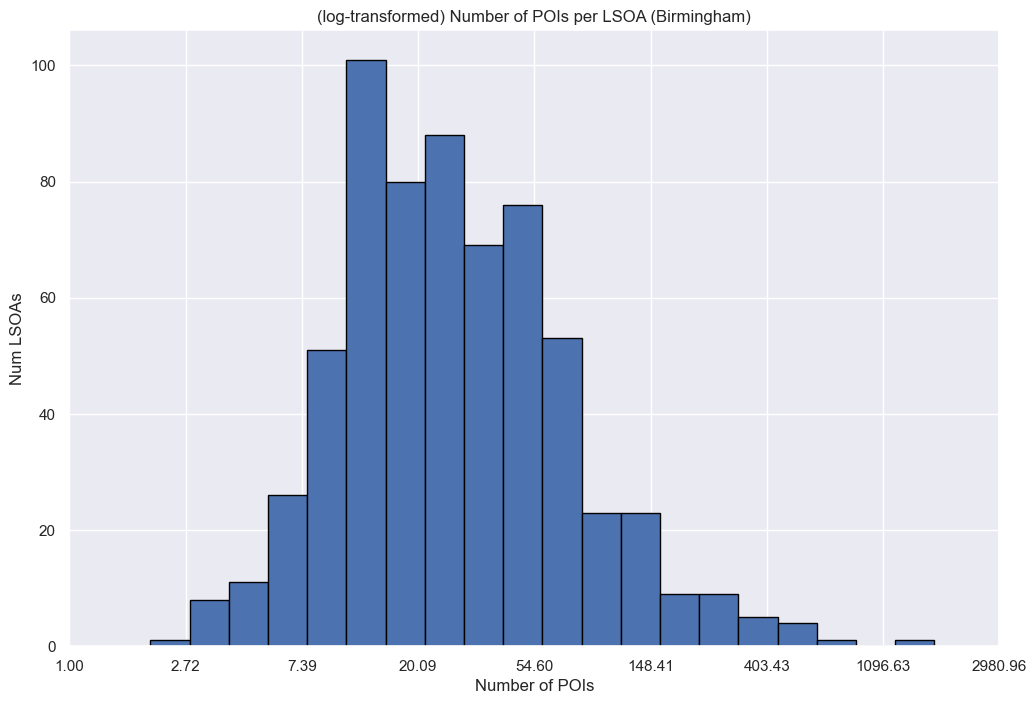

In [54]:
places_per_lsoa = pd.DataFrame(all_data_bham['log_num_places'])

plt.figure(figsize=(12, 8))
plt.hist(places_per_lsoa, bins=20, edgecolor='black')
sns.set_theme()
plt.xlim(0,8)
plt.ylabel('Num LSOAs')
plt.xlabel('Number of POIs')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.title('(log-transformed) Number of POIs per LSOA (Birmingham)')
plt.show()

### Frequency of Place Types (Top 20)

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_20932/2539250406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_top.values, y=category_top.index, palette='viridis')


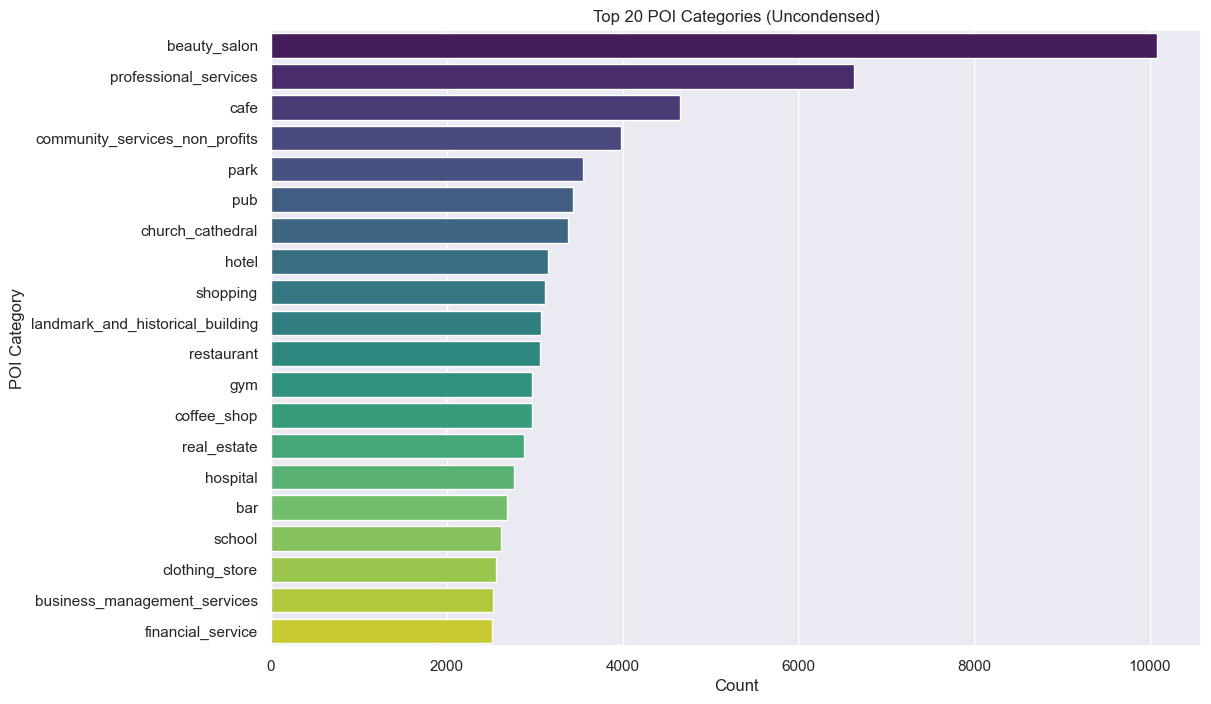

In [230]:
all_places = pd.concat([london_places, bham_places], axis=0)

category_counts = all_places['category'].value_counts()

category_top = all_places['category'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=category_top.values, y=category_top.index, palette='viridis')
sns.set_theme()
plt.xlabel('Count')
plt.ylabel('POI Category')
plt.title('Top 20 POI Categories (Uncondensed)')
plt.show()

### Frequency of Place Types (Top 20 Condensed)

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_20932/2399647150.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condensed_top['Count'], y=condensed_top.index, palette='viridis')


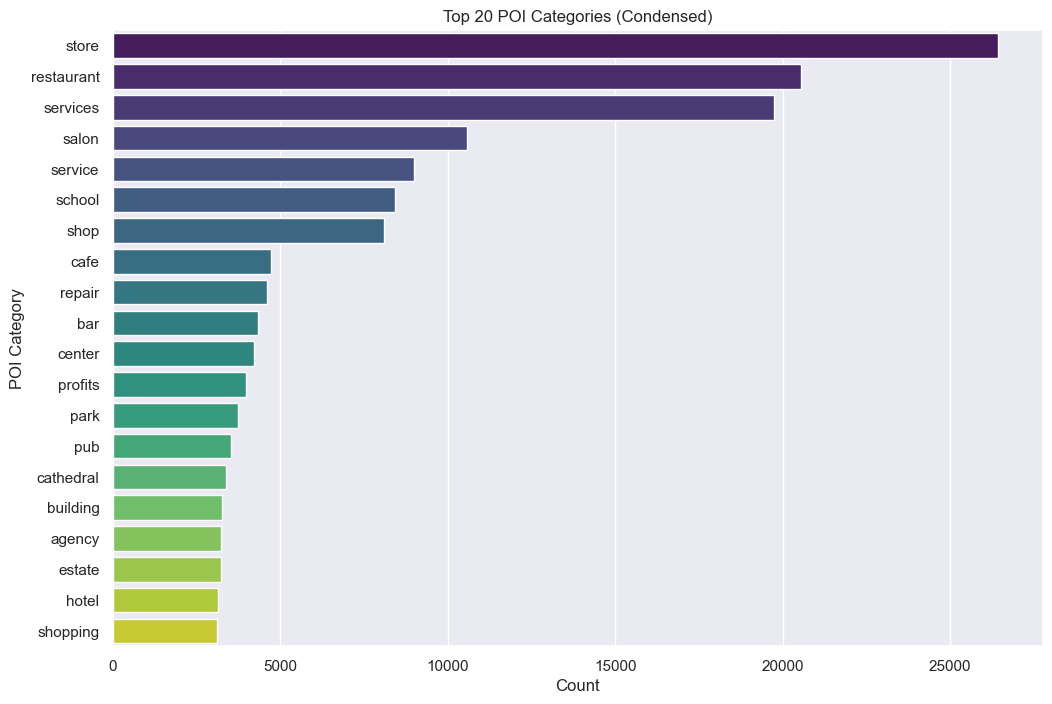

In [232]:
# Recycle the category collapse logic from DataCleaning.ipynb

# Automated Condensing of Column Types

# I'll group them by 'suffix' to find commonalities
suffix_groups = {}

# Iterate through
for index in category_counts.index:
    lower_index = index.lower()
    parts = lower_index.split('_')
    if len(parts) > 1:
        suffix = parts[-1]
        if suffix in suffix_groups:
            suffix_groups[suffix] += category_counts.loc[index].sum()
        else:
            suffix_groups[suffix] = category_counts.loc[index].sum()
    else:
        # Handle rows without suffixes
        suffix_groups[parts[0]] = category_counts.loc[index].sum()

condensed_categories = pd.DataFrame.from_dict(suffix_groups, orient='index', columns=['Count'])

condensed_categories_sorted = condensed_categories.sort_values(by='Count', ascending=False)

condensed_top = condensed_categories_sorted.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=condensed_top['Count'], y=condensed_top.index, palette='viridis')
sns.set_theme()
plt.xlabel('Count')
plt.ylabel('POI Category')
plt.title('Top 20 POI Categories (Condensed)')
plt.show()

### Collinearity Checks

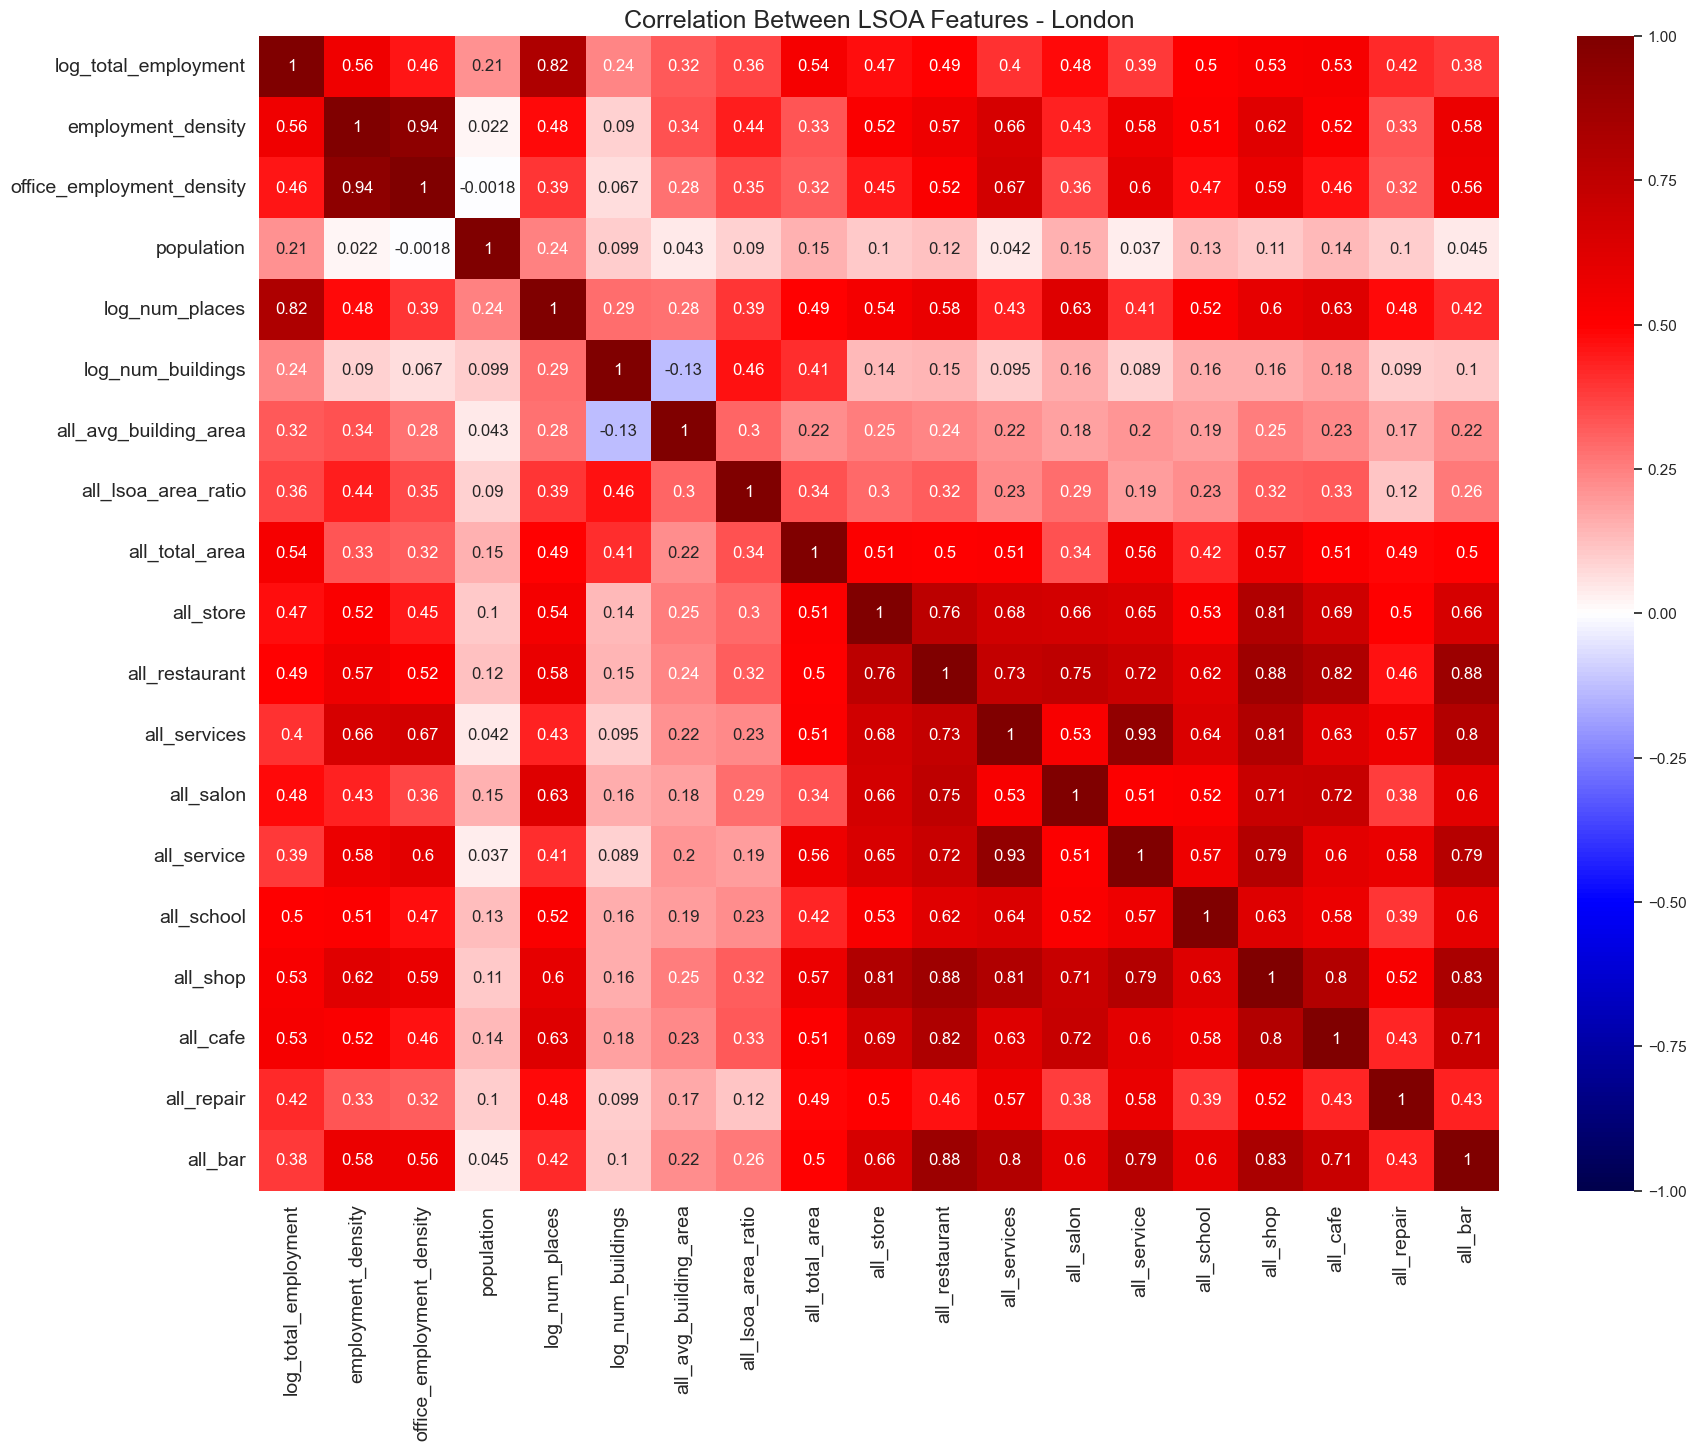

In [380]:
# London

selected_columns = [
    'log_total_employment',
    'employment_density',
    'office_employment_density',
    'population',
    'log_num_places',
    'log_num_buildings',
    'all_avg_building_area',
    'all_lsoa_area_ratio',
    'all_total_area',
    'all_store',
    'all_restaurant',
    'all_services',
    'all_salon',
    'all_service',
    'all_school',
    'all_shop',
    'all_cafe',
    'all_repair',
    'all_bar'
]

colinearity_features = all_data_london[selected_columns]

plt.figure(figsize=(20,15))

# Heatmap
sns.set_theme()
heatmap = sns.heatmap(colinearity_features.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14) 
plt.title('Correlation Between LSOA Features - London', fontsize=18)
plt.show()


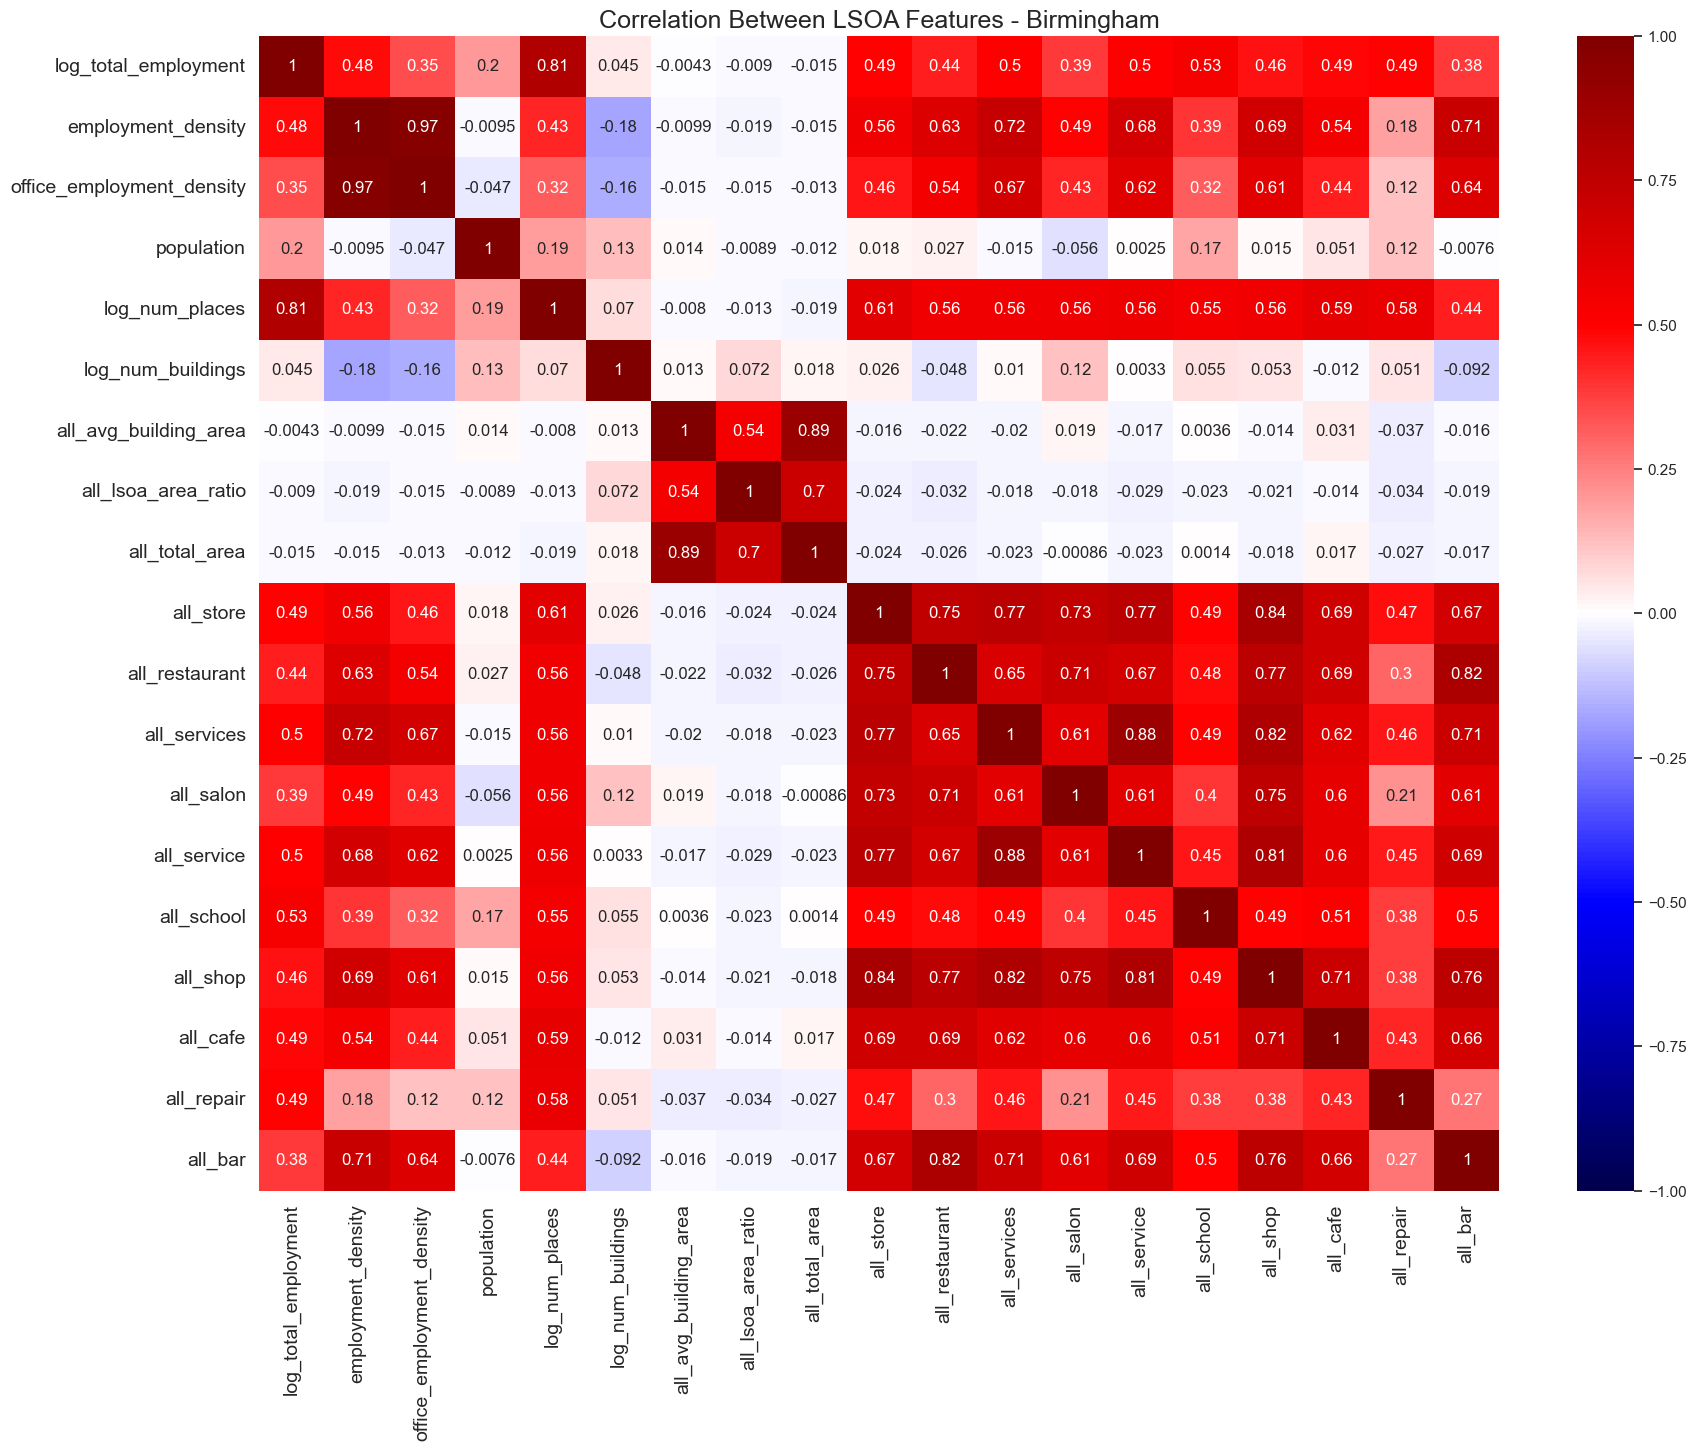

In [372]:
# Birmingham

selected_columns = [
    'log_total_employment',
    'employment_density',
    'office_employment_density',
    'population',
    'log_num_places',
    'log_num_buildings',
    'all_avg_building_area',
    'all_lsoa_area_ratio',
    'all_total_area',
    'all_store',
    'all_restaurant',
    'all_services',
    'all_salon',
    'all_service',
    'all_school',
    'all_shop',
    'all_cafe',
    'all_repair',
    'all_bar'
]

colinearity_features = all_data_bham[selected_columns]

plt.figure(figsize=(20,15))

# Heatmap
sns.set_theme()
heatmap = sns.heatmap(colinearity_features.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14) 
plt.title('Correlation Between LSOA Features - Birmingham', fontsize=18)
plt.show()


### Example Building Footprint Images

### Building Counts (By Type and Overall) - Per City

### Full London Plot? To show OSM completeness

### Feature Distribution Maps (See Exploratory Data Analysis Section for List of Needed)

In [ ]:
#### BELOW UNCHANGED FROM BIRMINGHAMTEST.IPYNB

# -----------------------------------------------------------------------------------------

# General Data Plots (Not from Model)

# Employment Count
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
all_data_cleaned.plot(ax=ax, column='total_employment', legend=True, cmap='viridis')
plt.title('Employment Count Map of Birmingham LSOAs')
ax.set_axis_off()
plt.title('Employment Count Map of Birmingham LSOAs')
plt.savefig('Plots/from_code/stats_bham/employment_count_map_bham.png')
plt.close(fig)

# Log Employment Count
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
all_data_cleaned.plot(ax=ax, column='log_total_employment', legend=True, cmap='viridis')
plt.title('(log) Employment Count Map of Birmingham LSOAs')
ax.set_axis_off()
plt.title('(log) Employment Count Map of Birmingham LSOAs')
plt.savefig('Plots/from_code/stats_bham/log_employment_count_map_bham.png')
plt.close(fig)

# Employment Density
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
all_data_cleaned.plot(ax=ax, column='employment_density', legend=True, cmap='viridis')
plt.title('Employment Density Map of Birmingham LSOAs')
ax.set_axis_off()
plt.title('Employment Density Map of Birmingham LSOAs')
plt.savefig('Plots/from_code/stats_bham/employment_density_map_bham.png')
plt.close(fig)

# Office Employment Density
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
all_data_cleaned.plot(ax=ax, column='office_employment_density', legend=True, cmap='viridis')
plt.title('Office Employment Density Map of Birmingham LSOAs')
ax.set_axis_off()
plt.title('Office Employment Density Map of Birmingham LSOAs')
plt.savefig('Plots/from_code/stats_bham/office_employment_density_map_bham.png')
plt.close(fig)

# Overture POI Density
all_data_cleaned['poi_density'] = all_data_cleaned['num_places'] / (all_data_cleaned['geometry']).to_crs("EPSG:27700").area

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
all_data_cleaned.plot(ax=ax, column='poi_density', legend=True, cmap='viridis')
plt.title('Overture POI Density Map of Birmingham LSOAs')
ax.set_axis_off()
plt.title('Overture POI Density Map of Birmingham LSOAs')
plt.savefig('Plots/from_code/stats_bham/poi_density_map_bham.png')
plt.close(fig)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
all_data_cleaned.plot(ax=ax, column='num_places', legend=True, cmap='viridis')
plt.title('Overture POI Count Map of Birmingham LSOAs')
ax.set_axis_off()
plt.title('Overture POI Count Map of Birmingham LSOAs')
plt.savefig('Plots/from_code/stats_bham/poi_count_map_bham.png')
plt.close(fig)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
all_data_cleaned.plot(ax=ax, column='log_num_places', legend=True, cmap='viridis')
plt.title('(log) Overture POI Count Map of Birmingham LSOAs')
ax.set_axis_off()
plt.title('(log) Overture POI Count Map of Birmingham LSOAs')
plt.savefig('Plots/from_code/stats_bham/log_poi_count_map_bham.png')
plt.close(fig)



### Overture Places Confidence Histogram

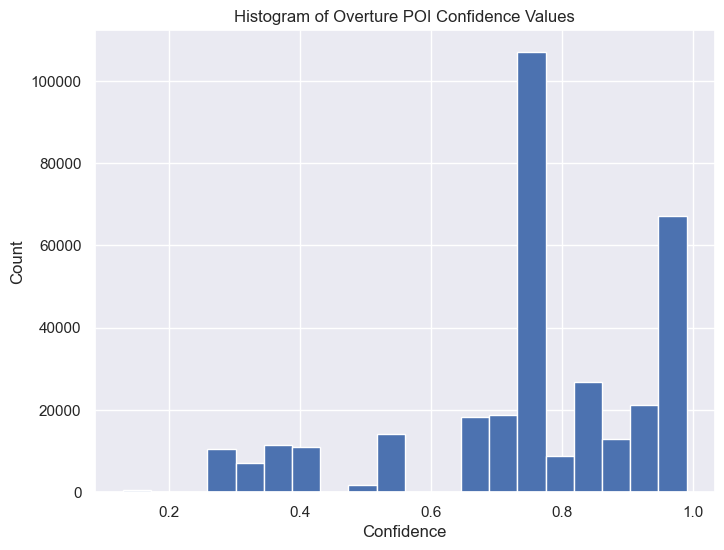

In [329]:
plt.figure(figsize=(8, 6))
plt.hist(all_places['confidence'], bins = 20, fill=True)
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Histogram of Overture POI Confidence Values')
plt.grid(True)
plt.show()